# U.S. Medical Insurance Costs
Codecademy Portfolio Project by Leah Fulmer

#### Preamble

I despise the United States medical insurance system and do not support the rote assumption of insurance costs functioning as they do now in 2024. Furthermore, body mass index has consistently been identified as a misleading measurement of a person's body fat content ([Romero-Corral 2008](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2877506/)), as well as an inaccurate measurement of health ([Visaria 2023](https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0287218)). While I resist the premise of the following data set, I recognize that this data set is part of the Codecademy Business Intelligence Data Analyst Career Path, and I am intent on approaching these projects sincerely. Thank you for understanding.


#### Table of Contents
[Section 1: Importing and Formatting the Data](#data)<br>
[Section 2: Initial Exploration](#initial)<br>
[Section 3: Analysis by Age](#age)<br>
[Section 4: Analysis by Body Mass Index (BMI)](#bmi)<br>
[Section 5: Comparison to Insurance Charge Formula](#formula)<br>

### Section 1: Importing and Formatting the Data <a id="data"></a>

In [22]:
# Import modules

import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [23]:
# Import data

data = pd.read_csv('insurance.csv')

columns = data.columns

age, sex, bmi, children, smoker, region, charges = \
data.iloc[:, 0], data.iloc[:, 1], data.iloc[:, 2], \
data.iloc[:, 3], data.iloc[:, 4], data.iloc[:, 5], data.iloc[:, 6]

In [24]:
# Examine data

n_rows, n_cols = len(data), len(columns)
print("The dataset consists of {} rows and {} columns.".format(n_rows, n_cols))

print("The highest insurance charge is ${}.".format(max(charges)))

print("\nThe data for the highest insurance charges are as follows...\n")

column_name = 'charges'
desired_value = 50000.0
filtered_rows = data[data[column_name] > desired_value]
print (filtered_rows)

The dataset consists of 1338 rows and 7 columns.
The highest insurance charge is $63770.42801.

The data for the highest insurance charges are as follows...

      age     sex     bmi  children smoker     region      charges
34     28    male  36.400         1    yes  southwest  51194.55914
543    54  female  47.410         0    yes  southeast  63770.42801
577    31  female  38.095         1    yes  northeast  58571.07448
819    33  female  35.530         0    yes  northwest  55135.40209
1146   60    male  32.800         0    yes  southwest  52590.82939
1230   52    male  34.485         3    yes  northwest  60021.39897
1300   45    male  30.360         0    yes  southeast  62592.87309


In [25]:
# Create color lists for all columns
# Color names found at https://waldyrious.net/viridis-palette-generator/

def create_color_list(input_series, string1, string2, string3):
    color_else = '#fde725'
    color3 = '#35b779'
    color2 = '#31688e'
    color1 = '#440154'
    color_list = []
    
    for i in input_series:
        if i == string1:
            color_list.append(color1)
        elif i == string2:
            color_list.append(color2)
        elif i == string3:
            color_list.append(color3)
        else:
            color_list.append(color_else)
    
    return color_list


sex_color_list = create_color_list(sex, 'female', '', '')
smoker_color_list = create_color_list(smoker, 'yes', '', '')
region_color_list = create_color_list(region, 'southwest', 'southeast', 'northwest')

colors_list_all = [age, sex_color_list, bmi, children, smoker_color_list, region_color_list, charges]
colors_list_age = [sex_color_list, bmi, children, smoker_color_list, region_color_list]
colors_list_bmi = [age, sex_color_list, children, smoker_color_list, region_color_list]

### Section 2: Initial Exploration <a id="initial"></a>

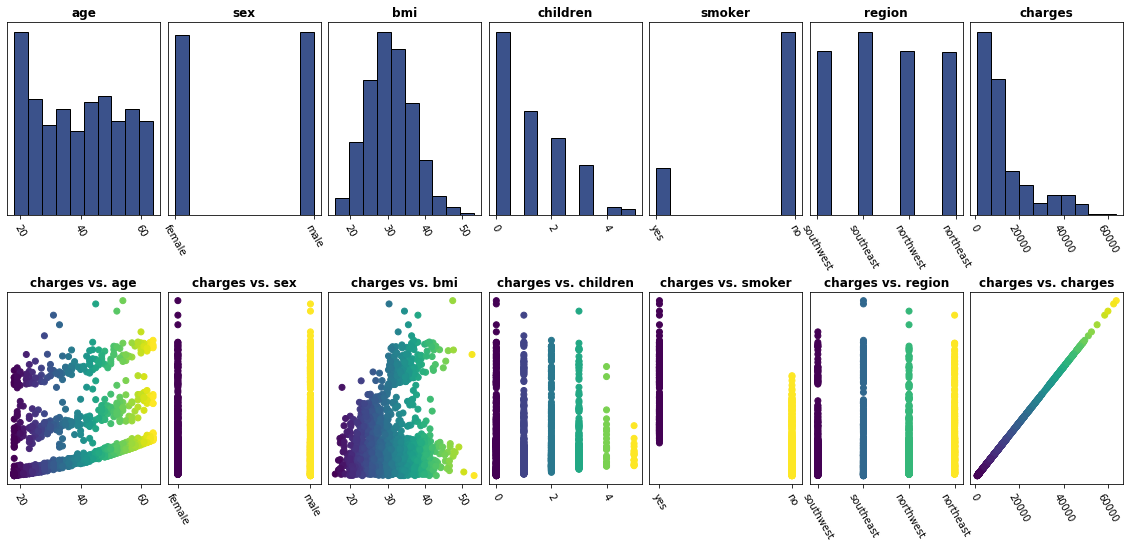

In [35]:
# Initital exploration
plt.figure(figsize=(20,8.5))


for i in range(n_cols):
    # Histogram
    plt.subplot(2, n_cols, i+1)
    plt.hist(data.iloc[:, i], color='#3b528b', edgecolor='black')
    
    plt.tick_params(left = False, labelleft = False)
    plt.xticks(rotation = -60)
    plt.title(columns[i], fontweight="bold")
    
    # Scatter, plotted against 'charges'
    plt.subplot(2, n_cols, i+8)
    plt.scatter(data.iloc[:, i], charges, c = colors_list_all[i], cmap = 'viridis')
    
    plt.tick_params(left = False, labelleft = False)
    plt.xticks(rotation = -60)
    plt.title("charges vs. "+ columns[i], fontweight="bold")

plt.subplots_adjust(wspace=0.05, hspace=0.4)
plt.show()


#### Discussion:
**Top row:** <br>
There is an even distribution of male vs. female patients, a normal distribution of BMIs, and a relatively even distribution of regions represented, with the southeast appearing slightly more often than the southwest, northeast, or northwest. The age distribution contains a large number of young patients, but an even distribution of ages after roughly age 25 at a count of roughly half the count of those younger than 25. The data is dominated by patients with no or few children and non-smokers, who represent ~5 times the number of smokers. Patient charges reveal a large number of charges less than \\$10,000, and a much lower number of charges above this. There is a stark dip in charge values above \\$10,000 and the continue to trail off as charges approach \\$60,000.

**Bottom row:** <br>
Males and females, patients across varying regions, and patients with varying number of children have relatively even insurance charge distributions. In the case of number of children, patients with 4-5 children have lower insurance charges than people with 3 children or fewer. In the graph of charges vs. age, there are 3 distinct groups of people, all with consistent slopes that correlate age with higher insurance charges. I am enthusiastic to explore the cause of these distinctions and the upward sloping behavior below. No smoker has a charge of less than \\$10,000, and no non-smoker has a charge of more than \\$40,000. BMI also reveal 3 different groups of people, but only one group feels distinct. The groups with the lowest insurance charges and with moderate insurance charges blend significantly. Further analysis may reveal meaningful distinctions between them.

### Section 3: Analysis by Age <a id='age'></a>

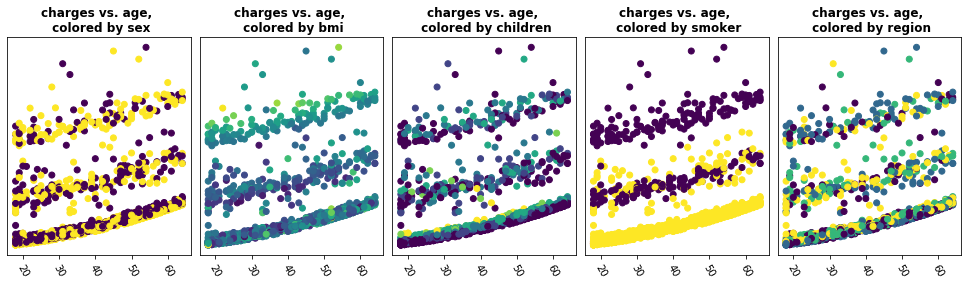

In [36]:
# Analysis of charges vs. age, colored by a third variable

plt.figure(figsize=(24,4))
plot_names_age = ['sex', 'bmi', 'children', 'smoker', 'region']

for i in range(len(colors_list_age)):
    # Scatter plots
    plt.subplot(1, n_cols, i+1)
    plt.scatter(age, charges, c = colors_list_age[i], cmap = 'viridis')
    
    plt.tick_params(left = False, labelleft = False)
    plt.xticks(rotation = -60)
    plt.title("charges vs. age, \n colored by "+plot_names_age[i], fontweight="bold")

plt.subplots_adjust(wspace=0.05, hspace=0)
plt.show()



#### Discussion:

The three distinct groups are most clearly distinguished by a patient's smoker status. The group with the lowest medical insurance charges consists exclusively of non-smokers, whereas the group with the highest charges contains exclusively smokers. However, both smokers and non-smokers find themselves in the group with moderately high insurance charges. I am curious about what factors lead to this behavior. There seems to be an even distribution of patients among the remaining visualizations, with colors based on sex, bmi, children, and region.

### Section 4: Analysis by Body Mass Index (BMI) <a id='bmi'></a>

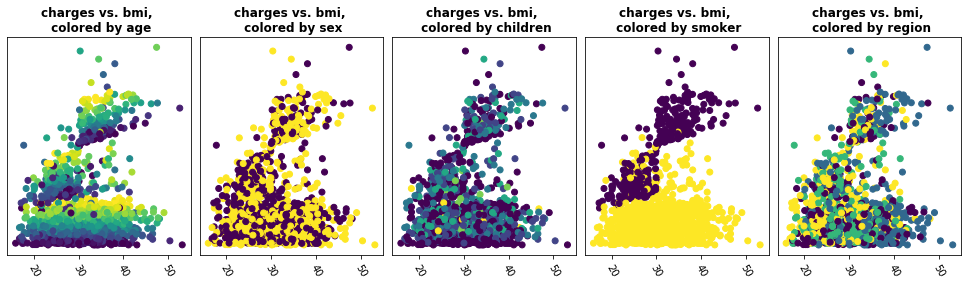

In [31]:
# Analysis of charges vs. bmi, colored by a third variable

plt.figure(figsize=(24,4))
plot_names_bmi = ['age', 'sex', 'children', 'smoker', 'region']

for i in range(len(colors_list_bmi)):
    # Scatter plots
    plt.subplot(1, n_cols, i+1)
    plt.scatter(bmi, charges, c = colors_list_bmi[i], cmap = 'viridis')
    
    plt.tick_params(left = False, labelleft = False)
    plt.xticks(rotation = -60)
    plt.title("charges vs. bmi, \n colored by "+plot_names_bmi[i], fontweight="bold")

plt.subplots_adjust(wspace=0.05, hspace=0)
plt.show()

#### Discussion:

The three groups discussed in [Section 2: Initial Exploration](#initial) are made explicit in the first figure with coloration according to age. Each group, identified by low, moderate, and high insurance charges respectively, reveals a consistent gradient of ages that associates higher insurance charges with older ages. There is curious behavior in the graph of charges vs. bmi with coloration according to a patient's smoker status. If a patient is a smoker with a BMI below 30, they consistently receive moderate insurance charges; however, if a patient is a smoker with a BMI above 30, they consistnetly receive high insurance charges. The distinction here is very stark. There seems to be clear "floors" in the calculation of insurance charges that disallow patients of certain profiles to receive less than certain insurnce charge values. Let's explore this.

### Section 5: Comparison to Insurance Charge Formula <a id=formula></a>

In previous projects with Codecademy, we were instructed to calculate insurance costs based on a patient's age, sex, bmi, etc. I am curious to explore the parallels between the formula we were given to calculate insurance charges and the behavior in insurance charge data we observe in this project.